In [1]:
# Hough Lines
# To get the hough lines, we convert the image to gray scale,
# Followed by getting the edges
# Then using the cv2.HoughLinesP (P for probabilistic)
# We get the values x1, y1, x2, y2 which we use to draw a line in the image

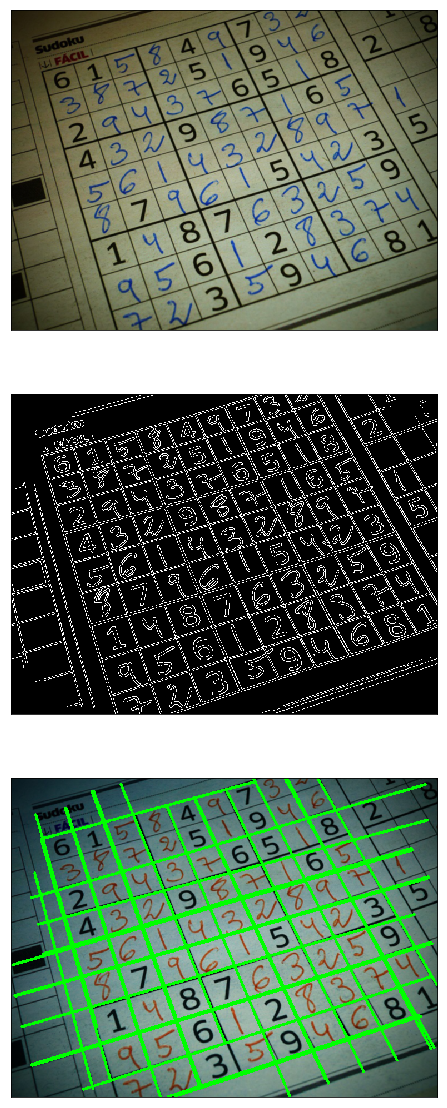

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('../images/soduku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We blur the image a little bit to get rid of noisy areas
img = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0)

# cv2.Canny(image, lower threshold, higher threshold)
edges = cv2.Canny(img, 170, 200)


# cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 225, maxLineGap=150, minLineLength=350)

img_lines = img.copy()

for line in lines:
    # Return all line segments as an array of arrays
    x1, y1, x2, y2 = line[0]
    # Draw a line from (x1,y1) to (x2,y2) with Green color (0,255,0) and line thickness of 3
    cv2.line(img_lines, (x1,y1), (x2,y2), (0, 255, 0), 3)


plt.figure(figsize=(70,20))
plt.subplot(311)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(312)
plt.imshow(edges, cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(313)
plt.imshow(img_lines, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

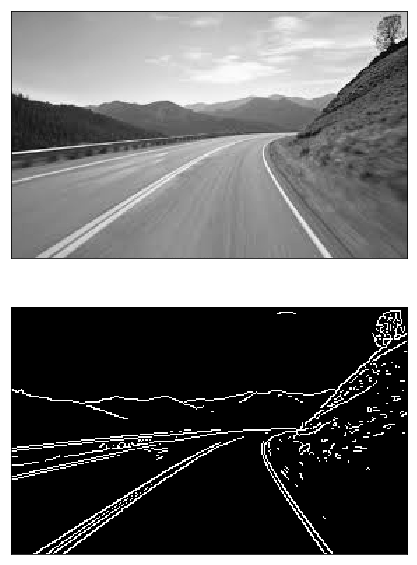

In [3]:
# Another sample

img = cv2.imread('../images/road.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We blur the image a little bit to get rid of noisy areas
#img = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0)

# cv2.Canny(image, lower threshold, higher threshold)
edges = cv2.Canny(img, 175, 200)

img_lines = img.copy()

plt.figure(figsize=(500,10))
plt.subplot(211)
plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([])

plt.subplot(212)
plt.imshow(edges, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

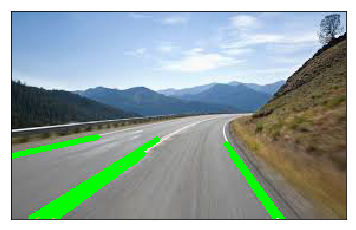

In [4]:
# cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=10)

for i, line in enumerate(lines):
    # Return all line segments as an array of arrays
    x1, y1, x2, y2 = line[0]
    
    # Draw lines only on the bottom half of the image
    if y1 > 100 and y2 > 100:
        # Draw a line from (x1,y1) to (x2,y2) with Green color (0,255,0) and line thickness of 3
        cv2.line(img_lines, (x1,y1), (x2,y2), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

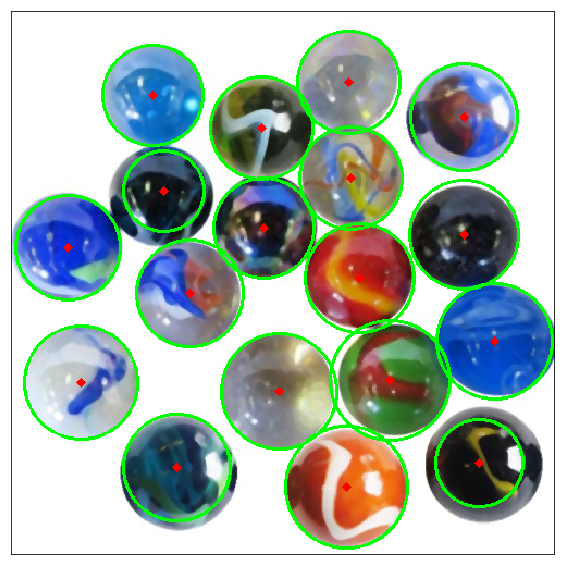

In [5]:
# Hough Circles

img = cv2.imread('../images/marbles.jpg')
img = cv2.medianBlur(img,5)
c_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, 100, 160)

# HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT,1,50, param1=50,param2=70,minRadius=5)

#Retuns center coordinates x, y, and the radius of the circle
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(c_img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(c_img,(i[0],i[1]),2,(0,0,255),3)


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(c_img, cv2.COLOR_BGR2RGB)), plt.xticks([]), plt.yticks([])
plt.show()